# Problrm Statement-1
Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df


# IMPORTING LIBRARIES

In [224]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score as sil
from sklearn.preprocessing import StandardScaler

# IMPORTING CSV FILE

In [231]:
wine=pd.read_csv("wine.csv")
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# EDA

In [232]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [233]:
wine.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [234]:
wine.duplicated().sum()

0

# Feature Engineering

In [235]:
wine_mod=wine.iloc[:,1:]

In [236]:
wine_mod.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Data Normalization

In [237]:
from sklearn.preprocessing import scale

In [238]:
features = wine_mod[["Alcohol","Malic","Ash","Alcalinity","Magnesium","Phenols","Flavanoids","Nonflavanoids","Proanthocyanins","Color","Hue","Dilution","Proline"]]

In [239]:
wine_std = scale(features)

In [240]:
wine_std

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

# Applying PCA
Importing PCA

In [241]:
pca=PCA()
winePca=pca.fit_transform(wine_std)

In [242]:
winePca

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [243]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

In [244]:
var=pca.explained_variance_ratio_

In [245]:
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

# Visualization

<BarContainer object of 13 artists>

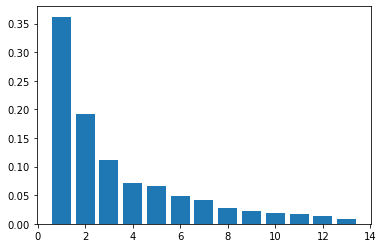

In [246]:
plt.bar(range(1,len(var)+1),var)

In [247]:
Var1=np.cumsum(np.round(var,decimals=4)*100)
Var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

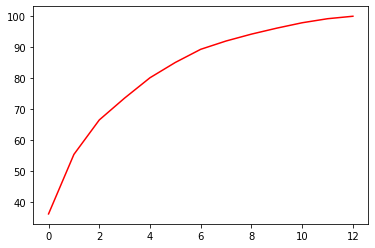

In [248]:
plt.plot(Var1,color="red")

In [249]:
wine_std.shape

(178, 13)

In [250]:
winePca.shape

(178, 13)

In [251]:
wine_pca=pd.concat([pd.DataFrame(winePca[:,0:4],columns=['pc1','pc2','pc3','pc4']),wine[["Type"]]],axis=1)

In [252]:
wine_pca.head(4)

,pc1,pc2,pc3,pc4,Type
0,3.316751,-1.443463,-0.165739,-0.215631,1
1,2.209465,0.333393,-2.026457,-0.291358,1
2,2.516740,-1.031151,0.982819,0.724902,1
3,3.757066,-2.756372,-0.176192,0.567983,1


# Comparison File Between After PCA & Before PCA

In [253]:
wine_pca.head(2) #after pca

,pc1,pc2,pc3,pc4,Type
0,3.316751,-1.443463,-0.165739,-0.215631,1
1,2.209465,0.333393,-2.026457,-0.291358,1


In [254]:
wine.head(2) #before pca

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


# Herarchical Clustering

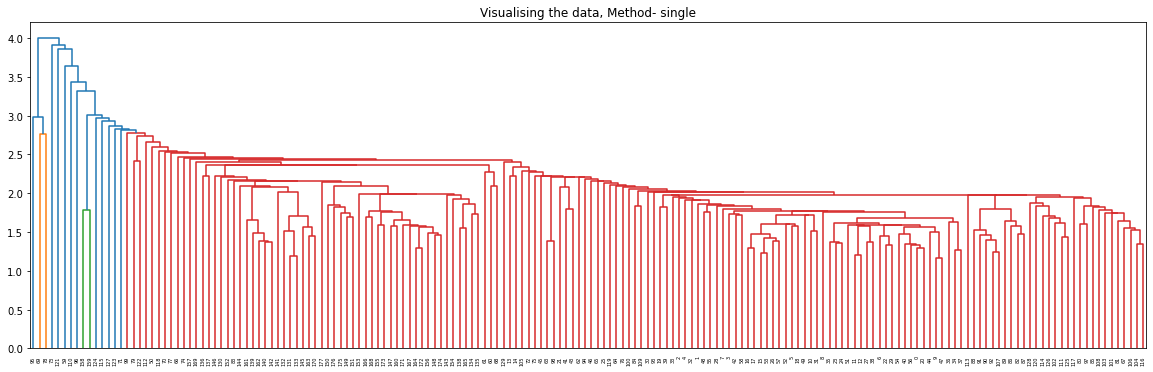

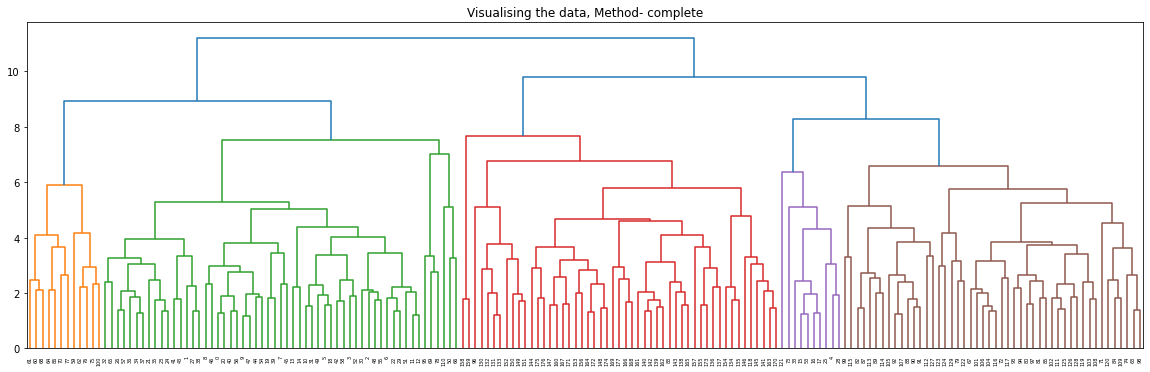

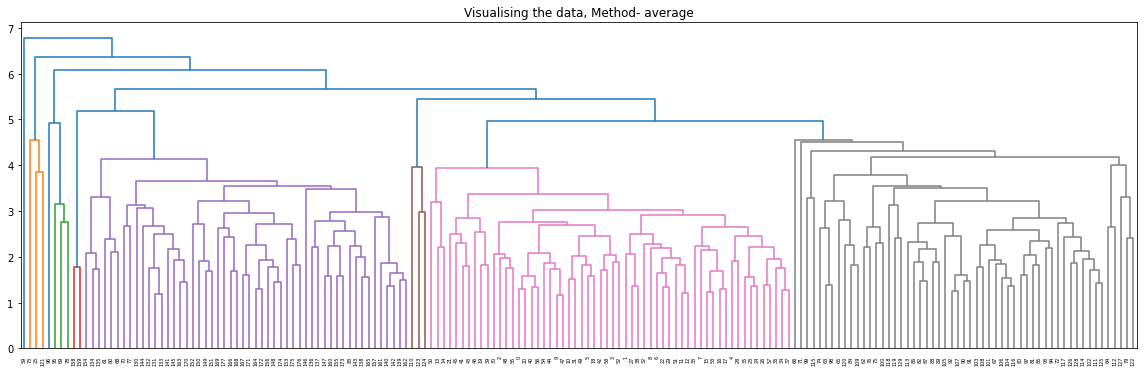

In [255]:
for methods in ['single','complete','average']: 
     plt.figure(figsize =(20, 6))
     plt.title('Visualising the data, Method- {}'.format(methods)) 
     Dendrogram = sch.dendrogram(sch.linkage(wine_std, method = methods,optimal_ordering=False))

In [256]:
nc=range(2,25)
sc_score=[]    
for i in nc:
    hc = AgglomerativeClustering(n_clusters=i, affinity = 'euclidean', linkage = 'complete')

    y=hc.fit_predict(wine_std)
    sc_score.append(sil(wine_std,y))

In [257]:
sc_score

[0.16186821075824515,
 0.20378689690677743,
 0.19382526203175696,
 0.18836501623937577,
 0.1754908860501433,
 0.18859621372810872,
 0.1906007220817229,
 0.1783273301236331,
 0.17264309292642238,
 0.15910659968453222,
 0.15042482483186173,
 0.1301671422807633,
 0.1362758715797362,
 0.12272519459447491,
 0.12526427196646867,
 0.13010348328640298,
 0.13000171265675803,
 0.12837198562703417,
 0.12639069357779198,
 0.12270968042343829,
 0.11659335214582078,
 0.12078517766165779,
 0.12451696266246651]

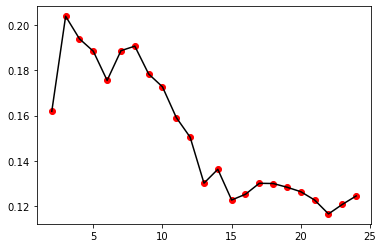

In [258]:
plt.plot(nc,sc_score,color="black")
plt.scatter(nc,sc_score,color="red")
plt.show()

In [259]:
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')
hclusters
y_hc=hclusters.fit_predict(wine_std)

In [260]:
wine1=wine

In [261]:
wine1['std_hcluster']=y_hc

In [262]:
wine1['std_hcluster'].value_counts()

1    57
0    51
2    48
3    12
4    10
Name: std_hcluster, dtype: int64

In [263]:
wine1.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,std_hcluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,4


# Hierchical For PCA's Data

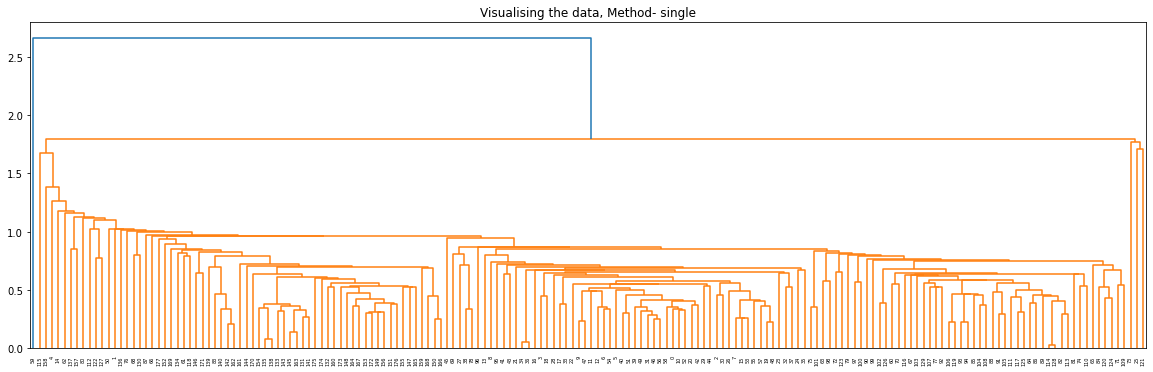

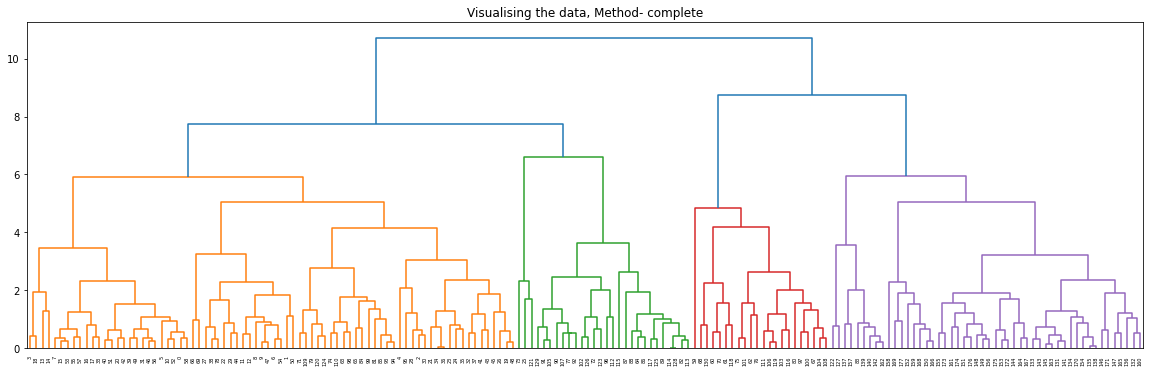

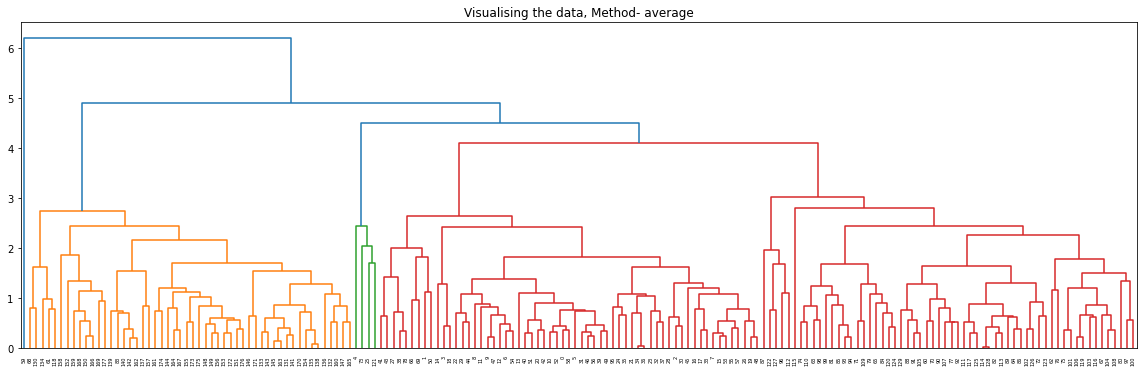

In [264]:
for methods in ['single','complete','average']: 
     plt.figure(figsize =(20, 6))
     plt.title('Visualising the data, Method- {}'.format(methods)) 
     Dendrogram = sch.dendrogram(sch.linkage(wine_pca.iloc[:,0:3], method = methods,optimal_ordering=False))

In [265]:
nc1=[2,3,4,5,6,7,8,9]
sc_score1=[]    
for i in nc1:
    hc1 = AgglomerativeClustering(n_clusters=i, affinity = 'euclidean', linkage = 'complete')

    y=hc1.fit_predict(wine_std)
    sc_score1.append(sil(wine_pca.iloc[:,0:3],y))

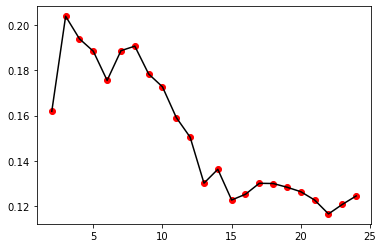

In [266]:
plt.plot(nc,sc_score,color="black")
plt.scatter(nc,sc_score,color="red")
plt.show()

In [267]:
hclusters1=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')
y_hc=hclusters1.fit_predict(wine_pca.iloc[:,0:3])

In [268]:
wine2=wine

In [269]:
wine2.head(3)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,std_hcluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1


In [270]:
wine2['pca_hcluster']=y_hc

In [271]:
wine2['pca_hcluster'].value_counts()

1    78
0    50
3    25
2    22
4     3
Name: pca_hcluster, dtype: int64

In [274]:
print("PCA having 4 features:-\n ",wine1['pca_hcluster'].value_counts())
print( "std:- \n",wine2['std_hcluster'].value_counts())

PCA having 4 features:-
  1    78
0    50
3    25
2    22
4     3
Name: pca_hcluster, dtype: int64
std:- 
 1    57
0    51
2    48
3    12
4    10
Name: std_hcluster, dtype: int64


# conclusion
1.As we can see there is not so much difference between Pca data and normal data when we are doing Heirchical clustering
    (2).In herarchical clustering if we do pca for same  data we get more advatages because the result we get same in less features

# K-Mean Clustering
Without PCA Data


In [275]:
nc=[2,3,4,5,6,7,8,9]
iner=[]    
for i in nc:
    km=KMeans(i)
    km.fit(wine_std)
    iner.append(km.inertia_)

C:\Users\phoneclicker\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\phoneclicker\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\phoneclicker\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\phoneclicker\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to 

In [276]:
iner

[1659.0079672511501,
 1277.928488844642,
 1175.7051928197118,
 1101.3402535169776,
 1051.5671072496646,
 979.6405676551308,
 934.3147552969427,
 891.8203936778734]

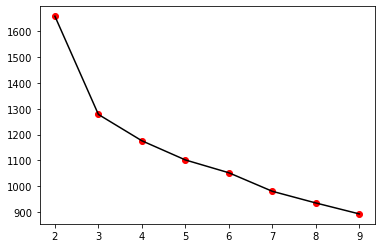

In [277]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

In [283]:
model_kmeans = KMeans(n_clusters=3) 
model_kmeans.fit(wine_std)

C:\Users\phoneclicker\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [284]:
wine3=wine

In [285]:
wine3["Norm_KMclustering"]=pd.Series(model_kmeans.labels_)

In [286]:
wine3.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,std_hcluster,pca_hcluster,Norm_KMclustering
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,1,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,1,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,1,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,1,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,4,1,2


In [287]:
wine3["Norm_KMclustering"].value_counts()

1    65
2    62
0    51
Name: Norm_KMclustering, dtype: int64

# K-Mean Clustering

ON PCA Data


In [288]:
nc1=[2,3,4,5,6,7,8,9]
iner1=[]    
for i in nc1:
    km1=KMeans(i)
    km1.fit(wine_pca.iloc[:,0:3])
    iner1.append(km1.inertia_)

C:\Users\phoneclicker\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\phoneclicker\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\phoneclicker\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\phoneclicker\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to 

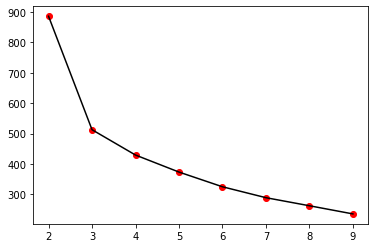

In [289]:
plt.plot(nc1,iner1,color="black")
plt.scatter(nc1,iner1,color="red")
plt.show()

In [290]:
model1_kmeans = KMeans(n_clusters=3) 
model1_kmeans.fit(wine_pca.iloc[:,0:3])

C:\Users\phoneclicker\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [291]:
wine4=wine
wine4["PCA_KMclustering"]=pd.Series(model1_kmeans.labels_)

In [292]:
wine4["PCA_KMclustering"].value_counts()

1    64
0    63
2    51
Name: PCA_KMclustering, dtype: int64

In [294]:
print("PCA having 4 features:-\n ",wine3['Norm_KMclustering'].value_counts())
print( "std:- \n",wine4['PCA_KMclustering'].value_counts())

PCA having 4 features:-
  1    65
2    62
0    51
Name: Norm_KMclustering, dtype: int64
std:- 
 1    64
0    63
2    51
Name: PCA_KMclustering, dtype: int64


# conclusion:-

1.As we can see there is not so much difference between Pca data and normal data when we are doing K-Means clustering (2).In K-Means clustering if we do pca for same data we get more advatages because the result we get same in less features
